In [41]:
import numpy as np
import math
from matplotlib import pyplot as plt

In [37]:
N0 = 1
N1 = 64
F1 = 9
N2 = 32
F2 = 1
N3 = 1
F3 = 5
H = 255
W = 255

#load data
conv1_w = np.array(np.fromfile(open("./weights/conv1_weights_3x_flp.bin", "r"), dtype=np.single))
conv1_b = np.array(np.fromfile(open("./weights/conv1_biases_3x_flp.bin", "r"), dtype=np.single))
conv2_w = np.array(np.fromfile(open("./weights/conv2_weights_3x_flp.bin", "r"), dtype=np.single))
conv2_b = np.array(np.fromfile(open("./weights/conv2_biases_3x_flp.bin", "r"), dtype=np.single))
conv3_w = np.array(np.fromfile(open("./weights/conv3_weights_3x_flp.bin", "r"), dtype=np.single))
conv3_b = np.array(np.fromfile(open("./weights/conv3_biases_3x_flp.bin", "r"), dtype=np.single))


In [89]:
step_sizes = {"uniform":1.0, "gaussian": 1.596, "laplacian": 1.414, "gamma": 1.154}

def generate_plot(x):
    q25, q75 = np.percentile(x, [25, 75])
    bin_width = 2 * (q75 - q25) * len(x) ** (-1/3)
    if (x.max() - x.min()) == 0:
        bins = 1
    else :
        bins = round((x.max() - x.min()) / bin_width)
    plt.hist(x, bins=bins)

def print_stats(data, title, distribution):
    std = 3*(np.std(data))+ 0.000001
    print(title, " standard deviation: ", std)
    bit_length = 9
    step_size = step_sizes[distribution]/bit_length
    s = step_size*std
    fractional_bits = -math.ceil(np.log(s))
    print(title, "fractional bits ", fractional_bits)
    print("min value: ", data.min())
    print("max value: ", data.max())


conv1 weights
conv1 weights  standard deviation:  0.32539495242929456
conv1 weights fractional bits  2
min value:  -0.5994025
max value:  0.534076


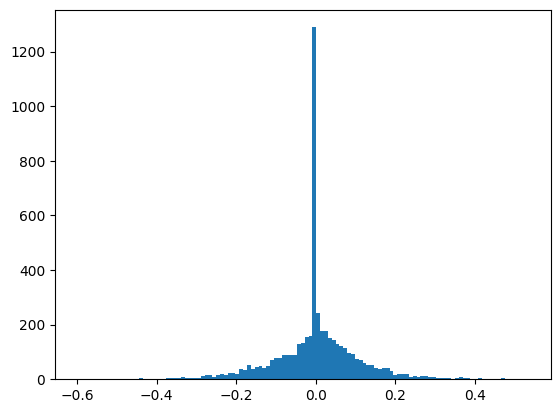

In [90]:
#conv1 weights
title = "conv1 weights"
generate_plot(conv1_w)
print(title)
print_stats(conv1_w, title, "laplacian")

conv1 biases
conv1 biases  standard deviation:  0.2059007079730034
conv1 biases fractional bits  3
min value:  -0.19804245
max value:  0.38209084


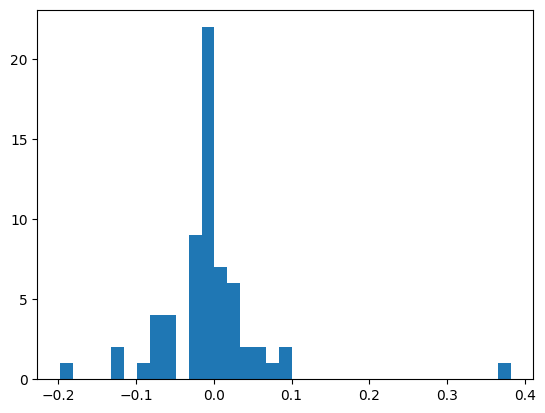

In [91]:
title = "conv1 biases"
generate_plot(conv1_b)
print(title)
print_stats(conv1_b, title, "laplacian")

conv2 weights
conv2 weights  standard deviation:  0.47266139252281186
conv2 weights fractional bits  2
min value:  -0.85179186
max value:  0.668786


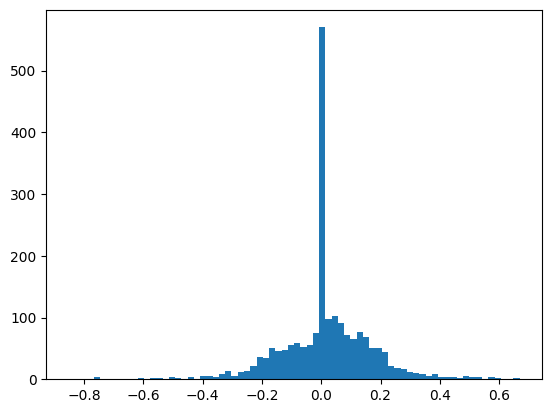

In [92]:
title = "conv2 weights"
generate_plot(conv2_w)
print(title)
print_stats(conv2_w, title, "gaussian")

conv2 biases
conv2 biases  standard deviation:  0.0862308458814621
conv2 biases fractional bits  4
min value:  -0.05349957
max value:  0.08442124


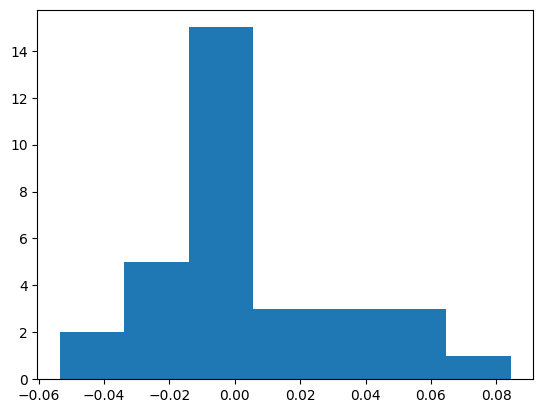

In [93]:
title = "conv2 biases"
generate_plot(conv2_b)
print(title)
print_stats(conv2_b, title, "gamma")

conv3 weights
conv3 weights  standard deviation:  0.06279521225190163
conv3 weights fractional bits  4
min value:  -0.05459739
max value:  0.16221903


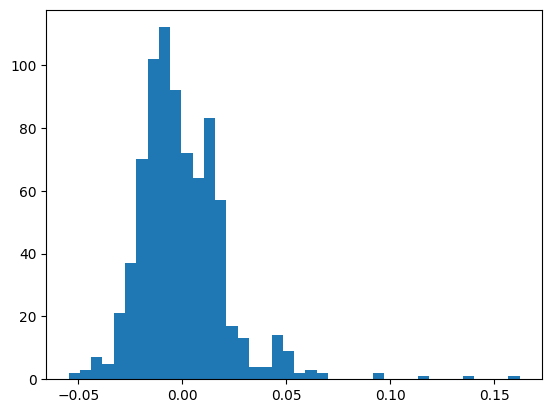

In [94]:
title = "conv3 weights"
generate_plot(conv3_w)
print(title)
print_stats(conv3_w, title, "gamma")

conv3 biases
conv3 biases  standard deviation:  1e-06
conv3 biases fractional bits  16
min value:  0.028888203
max value:  0.028888203


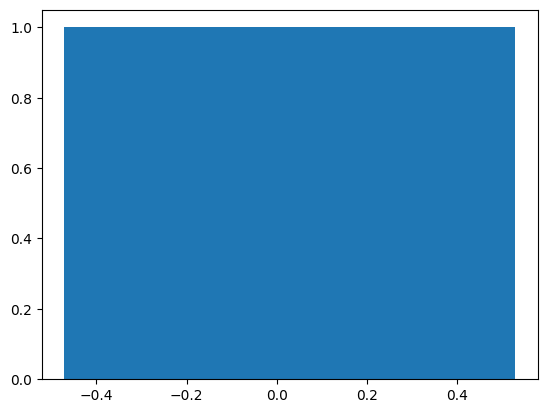

In [95]:
title = "conv3 biases"
generate_plot(conv3_b)
print(title)
print_stats(conv3_b, title, "uniform")